In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
ins_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')

In [4]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(ins_df['sex'].drop_duplicates())
ins_df['sex'] = le.transform(ins_df['sex'])

In [16]:
le.fit(ins_df['smoker'].drop_duplicates())
ins_df['smoker'] = le.transform(ins_df['smoker'])

In [17]:
le.fit(ins_df['region'].drop_duplicates())
ins_df['region'] = le.transform(ins_df['region'])

In [18]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


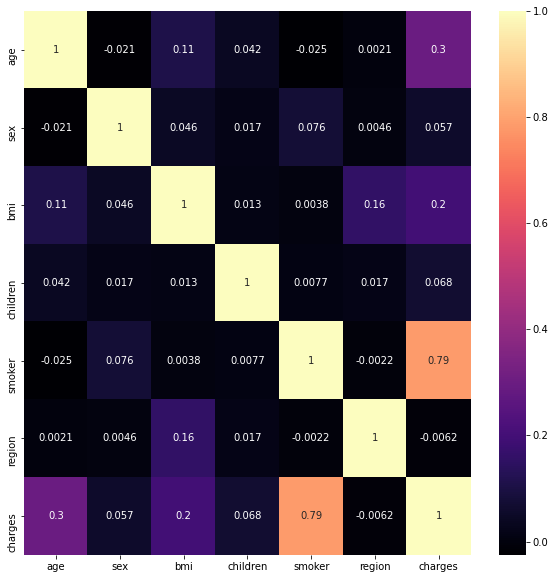

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(ins_df.corr(), annot = True, cmap ='magma')

In [20]:
X = ins_df.drop(['region', 'charges'], axis = 1)

Y = ins_df['charges']

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [22]:
scaler.fit(X)

X_scaler = scaler.transform(X)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, Y, test_size = 0.2, random_state = 5 )

In [90]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(normalize = True)

In [91]:
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [92]:
lr_model.score(X_test, Y_test)

0.7777630966249414

In [93]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [105]:
X_new = [[32, 1, 28.880, 0, 0	]]

In [106]:
X_newScaler = scaler.transform(X_new)

In [107]:
lr_model.predict(X_newScaler)

array([5329.53376051])